In [2]:
# Step 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

sns.set(style='whitegrid')
# Use a valid style from matplotlib.style.available, for example 'seaborn-v0_8-darkgrid'
plt.style.use('seaborn-v0_8-darkgrid')

In [3]:
# Step 2: Load Dataset
df = pd.read_csv("/content/drive/MyDrive/Data Science/netflix1.csv")
print(df.head())

  show_id     type                             title         director  \
0      s1    Movie              Dick Johnson Is Dead  Kirsten Johnson   
1      s3  TV Show                         Ganglands  Julien Leclercq   
2      s6  TV Show                     Midnight Mass    Mike Flanagan   
3     s14    Movie  Confessions of an Invisible Girl    Bruno Garotti   
4      s8    Movie                           Sankofa     Haile Gerima   

         country date_added  release_year rating  duration  \
0  United States  9/25/2021          2020  PG-13    90 min   
1         France  9/24/2021          2021  TV-MA  1 Season   
2  United States  9/24/2021          2021  TV-MA  1 Season   
3         Brazil  9/22/2021          2021  TV-PG    91 min   
4  United States  9/24/2021          1993  TV-MA   125 min   

                                           listed_in  
0                                      Documentaries  
1  Crime TV Shows, International TV Shows, TV Act...  
2                 TV Dr

In [5]:
# Step 3: Data Cleaning
df.drop_duplicates(inplace=True)
df.dropna(subset=['director', 'country'], inplace=True)
df['date_added'] = pd.to_datetime(df['date_added'])
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8790 non-null   object        
 1   type          8790 non-null   object        
 2   title         8790 non-null   object        
 3   director      8790 non-null   object        
 4   country       8790 non-null   object        
 5   date_added    8790 non-null   datetime64[ns]
 6   release_year  8790 non-null   int64         
 7   rating        8790 non-null   object        
 8   duration      8790 non-null   object        
 9   listed_in     8790 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(8)
memory usage: 686.8+ KB
None


/tmp/ipython-input-6-1794881753.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='type', data=df, palette='pastel')


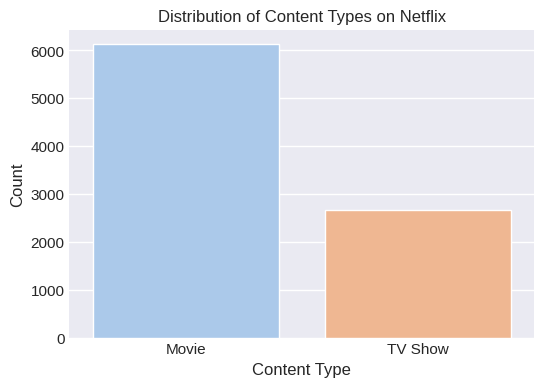

In [6]:
# Step 4.1: Content Type Distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='type', data=df, palette='pastel')
plt.title("Distribution of Content Types on Netflix")
plt.xlabel("Content Type")
plt.ylabel("Count")
plt.show()

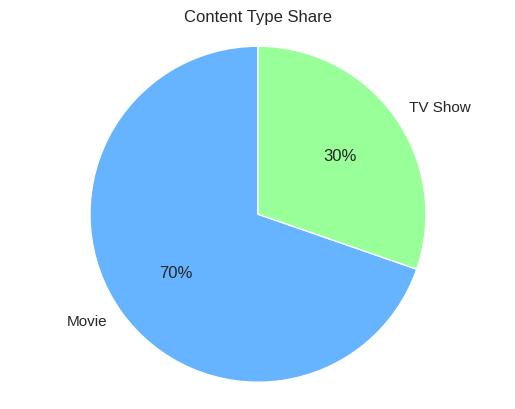

In [7]:
# Pie chart
type_counts = df['type'].value_counts()
plt.pie(type_counts, labels=type_counts.index, autopct='%1.0f%%', startangle=90, colors=['#66b3ff','#99ff99'])
plt.title("Content Type Share")
plt.axis('equal')
plt.show()

/tmp/ipython-input-8-3762882272.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rating_counts.index, y=rating_counts.values, palette='muted')


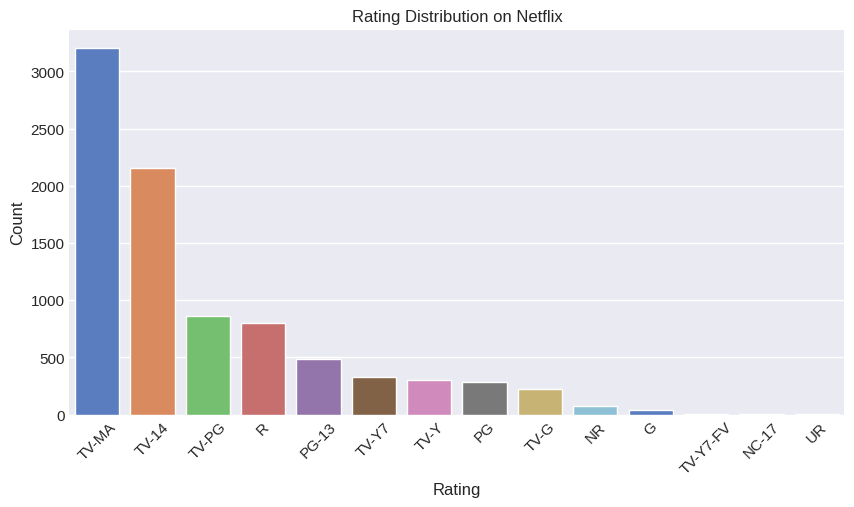

In [8]:
# Step 4.2: Rating Distribution
rating_counts = df['rating'].value_counts()
plt.figure(figsize=(10, 5))
sns.barplot(x=rating_counts.index, y=rating_counts.values, palette='muted')
plt.xticks(rotation=45)
plt.title("Rating Distribution on Netflix")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

/tmp/ipython-input-9-356599318.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='year_added', data=df, order=sorted(df['year_added'].dropna().unique()), palette='rocket')


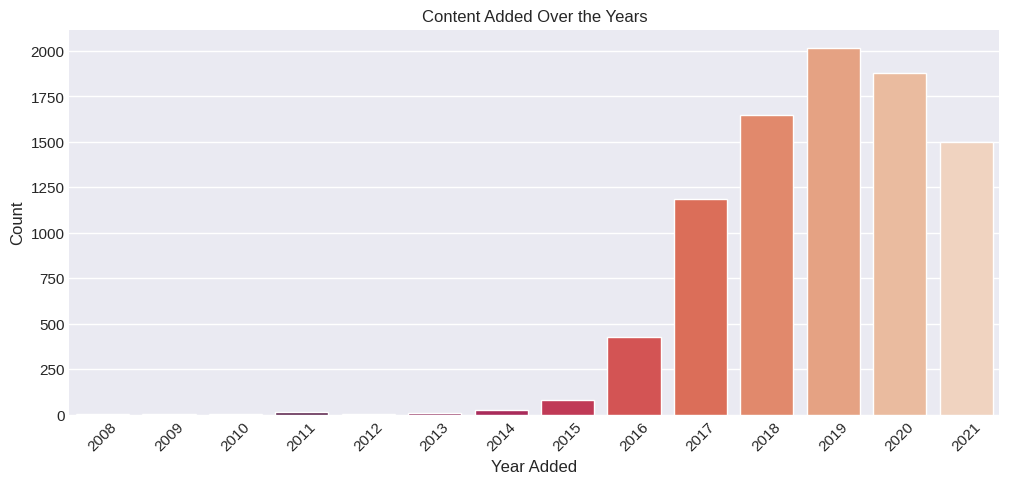

In [9]:
# Step 4.3: Content Added Over Years
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month

plt.figure(figsize=(12, 5))
sns.countplot(x='year_added', data=df, order=sorted(df['year_added'].dropna().unique()), palette='rocket')
plt.title("Content Added Over the Years")
plt.xlabel("Year Added")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

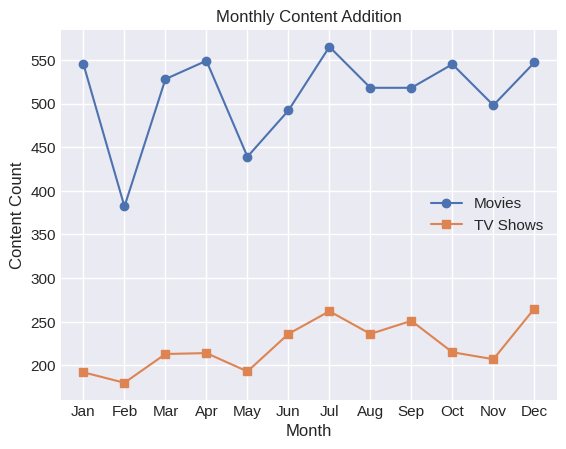

In [10]:
# Step 4.4: Monthly Additions (Movies vs TV Shows)
monthly_movies = df[df['type'] == 'Movie']['month_added'].value_counts().sort_index()
monthly_shows = df[df['type'] == 'TV Show']['month_added'].value_counts().sort_index()

plt.plot(monthly_movies.index, monthly_movies.values, label='Movies', marker='o')
plt.plot(monthly_shows.index, monthly_shows.values, label='TV Shows', marker='s')
plt.xticks(range(1,13), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.xlabel("Month")
plt.ylabel("Content Count")
plt.title("Monthly Content Addition")
plt.legend()
plt.grid(True)
plt.show()

/tmp/ipython-input-11-4191377836.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette='coolwarm')


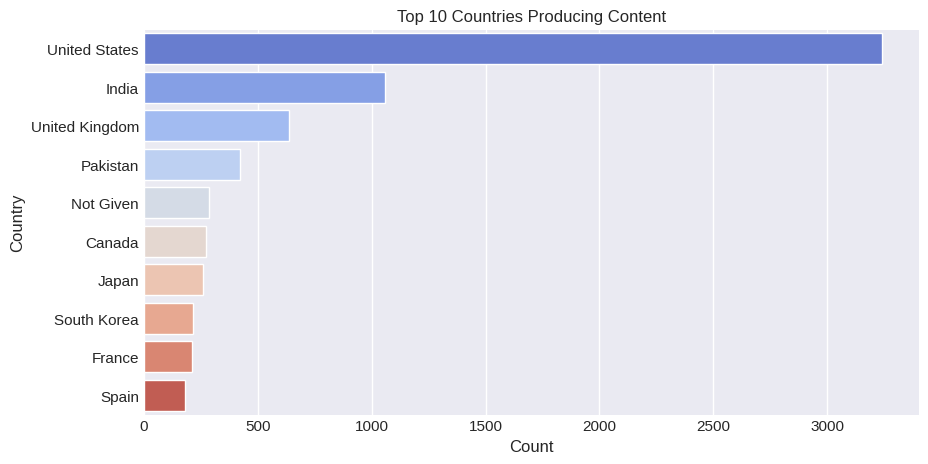

In [11]:
# Step 4.5: Top 10 Countries
top_countries = df['country'].value_counts().head(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='coolwarm')
plt.title("Top 10 Countries Producing Content")
plt.xlabel("Count")
plt.ylabel("Country")
plt.show()

/tmp/ipython-input-12-4106874418.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_directors.values, y=top_directors.index, palette='Blues_d')


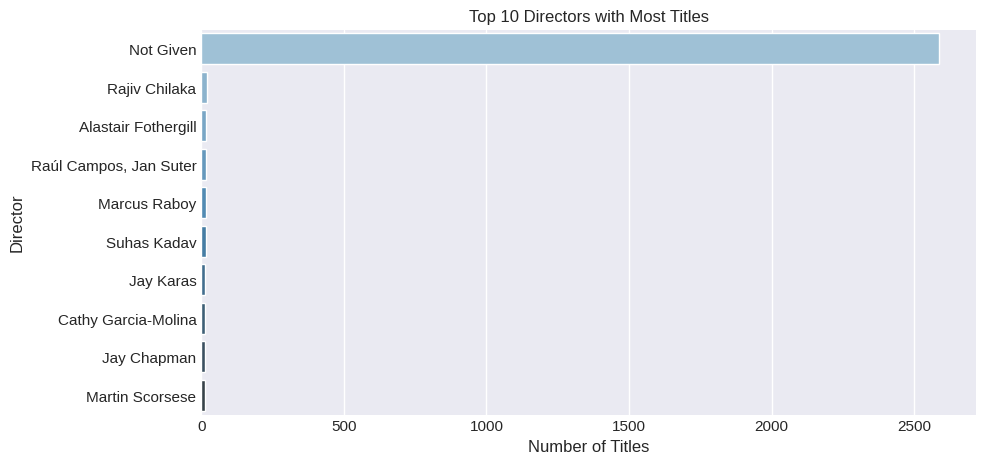

In [12]:
# Step 4.6: Top 10 Directors
top_directors = df['director'].value_counts().head(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=top_directors.values, y=top_directors.index, palette='Blues_d')
plt.title("Top 10 Directors with Most Titles")
plt.xlabel("Number of Titles")
plt.ylabel("Director")
plt.show()

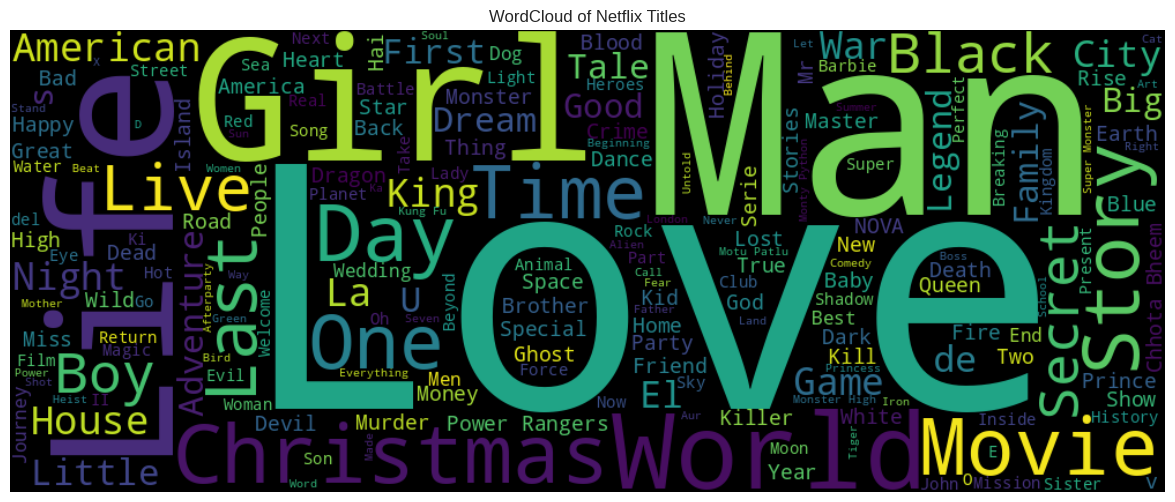

In [13]:
# Step 4.7: WordCloud of Titles
titles = ' '.join(df['title'].dropna())
wordcloud = WordCloud(width=1000, height=400, background_color='black').generate(titles)
plt.figure(figsize=(15, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud of Netflix Titles")
plt.show()

/tmp/ipython-input-14-202513141.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.values, y=genre_counts.index, palette='Set2')


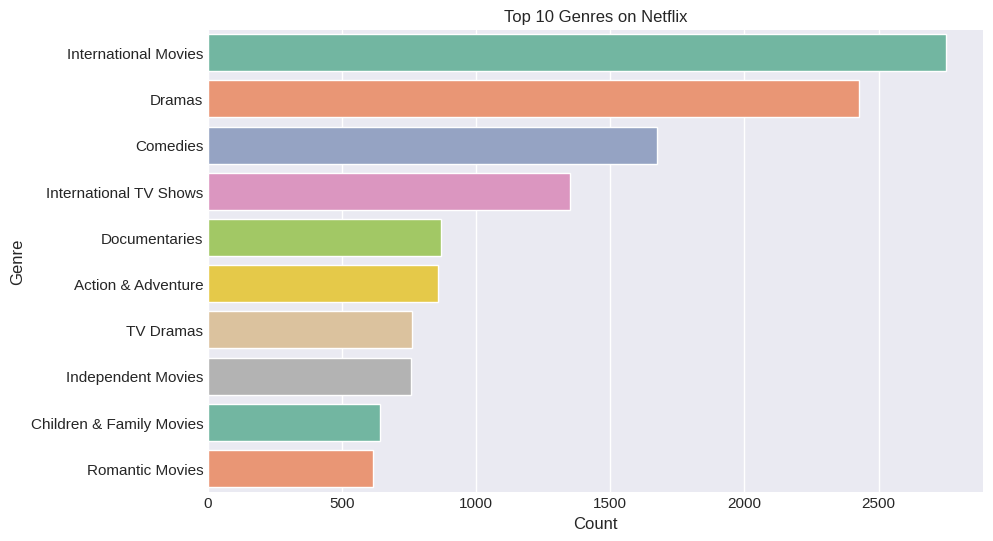

In [14]:
# Step 4.8: Most Common Genres
df['genres'] = df['listed_in'].apply(lambda x: x.split(', '))
all_genres = sum(df['genres'], [])
genre_counts = pd.Series(all_genres).value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=genre_counts.values, y=genre_counts.index, palette='Set2')
plt.title("Top 10 Genres on Netflix")
plt.xlabel("Count")
plt.ylabel("Genre")
plt.show()